In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from thinkdsp import *

def plot_gaussian(std):
    M = 64
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

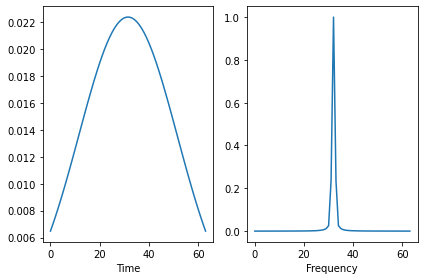

In [35]:
plot_gaussian(20)

In [36]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

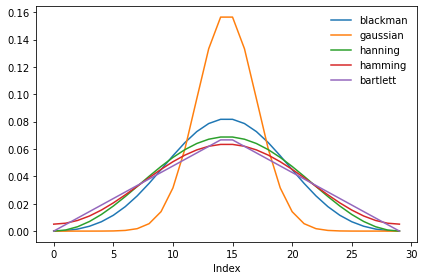

In [62]:
signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=441000)

M = 30
gaussian = scipy.signal.gaussian(M=M, std=2.5)   
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming, bartlett]
names = ['blackman', 'gaussian', 'hanning', 'hamming', 'bartlett']
for window in windows:
    window /= sum(window)
    
for window, name in zip(windows, names):
    plt.plot(window, label=name)
    decorate(xlabel='Index')

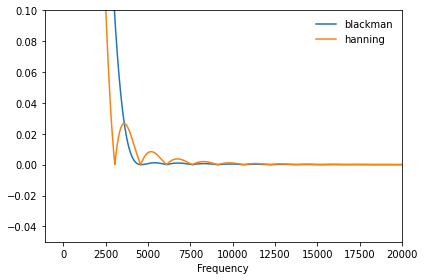

In [76]:
for window, name in zip(windows, names):
    if (name != 'blackman' and name != 'hanning'):
        continue
    padded =  zero_pad(window, len(wave))
    plt.plot(abs(np.fft.rfft(padded)), label=name)
    decorate(xlabel='Frequency')
    plt.ylim(top=0.1)
    plt.xlim(right = 20000)